# Abstract

In this project, I try to cluster NFL teams from the seasons between 2002 and 2020 in order to find similarities. There are two goals for doing this. The first is to help NFL teams understand themselves and their opponents better, which is to say teams could find teams similar to themselves or their opponents to find ways to improve their strategy by studying what these similar teams did well or how they were stopped. The second is to help media outlets generate more traffic by providing another way for fans to interpret the relative skill of teams, which hopefully in turn makes them more active in consuming content by the outlet.

The final result is a set of 3 clusters that seems to meaningfully explain the data and show differences between teams. However, while this marks a good beginning, in the current state, it is not enough to fully satisfy either goal.

After a brief introduction, I go into more detail about my motivation for the project, before briefly exploring related work in the field. I then explain my intended methods, and describe the process through the experiments and results sections. Finally, after a brief conclusion, I point for areas of future improvement.

# Introduction

Like most professional sports leagues, the NFL has lots of interest, which means lots of money in the sport and many fans invested in following it. The NFL also has lots of historical data, which makes it possible to compare teams from years apart to see where a current team stacks up against the all-time greats, or see how a legendary team's numbers would look in the modern game. The implications from this for the fan are fairly easy to see. Stats make it possible to claim a team is the best ever, and they allow for the claim that modern teams would not know how to handle real teams from back in the day. 

However, finding similarities between teams could be of interest to fans and teams alike. Being able to group teams together could not only allow fans to get a better understanding of which teams are actually good and which teams are beneficiaries of easy schedules or lucky breaks. But grouping teams could also allow teams to better understand themselves or their opponents.

# Motivation

My goal with this project is to help both NFL teams and media outlets by finding groupings of similar NFL teams.

For NFL teams, the question is whether it is possible to find meaningful groupings of teams in order to better understand themselves and their opponents. For example, if a team is struggling with finding an identity, or how to win with their identity, if they could find teams similar to them, they might be able to learn from what those teams did. Conversely, sometimes a team is facing an opponent that does not have much film, or an opponent that seems unstoppable. If a team can find similar teams to their upcoming opponent, that adds more film to watch, to hopefully find how other teams were able to handle similar teams.

For media outlets, the goal is to make the game easier to understand for the fans, which hopefully drives more interaction in terms of minutes watched for television programs and site views for websites. Being able to show similar teams to teams from the current season could help fans understand how good the current teams are. It is a fairly common problem as a fan, trying to understand which teams are good and which are not. Win-Loss record is the easiest metric, but there are many problems with it. Sometimes a team has a lot of losses but has faced many really good teams and had a few bad calls go against them. In these cases, the team is likely better than their record shows. Conversely, sometimes a team has many wins, but in reality they have only played mediocre teams or had a few calls go their way. In these cases, the team is likely better than their record shows. Often fans look to experts to interpret which teams are good and which are not. However, it could be meaningful for fans to have a data driven way to evaluate teams to see how good they really are.

Clearly, this problem is best solved through the unsupervised method of clustering. Ideally, clustering will reveal meaningful groupings of teams that will both help NFL teams to understand themselves and their opponents better, and fans understand the relative strength of teams, which will financially benefit media outlets through views. Even if initial methods do not prove supremely successful, this should still serve as a good starting point for further analysis.


# Related Work

There has not been a tremendous amount of clustering work done for the NFL, at least not that is easily findable publicly. Some of the more common examples are comparing teams in the current year based on specific metrics, such as play formation on offence, and trying to group players together to then find teams who are most in need of specific free agents. Both of these differ fairly significantly from the idea of clustering teams historically to both try to help NFL teams gain a better understanding, and to help media outlets get more traffic by giving fans another way of evaluating the skill of current teams.

# Proposed Method

To conduct this analysis, I took offensive and defensive statistics for NFL teams from 2012 to present, from Pro Football Reference. I chose to only go back to 2012 because that is the year that the Houston Texans joined the league, the most recent team to join, and giving the NFL a divisional structure that has unchanged since that time. While it is probably negligible, there is a chance that using data from before 2012 could create problems, as stats produced are to some degree a product of the competition. Different formats meant scheduling differences including but not limited to playing a different number of games and playing divisional opponents more frequently than in this format. Being in a division with the best teams would thus hurt a team's statistics more than it does now.

The data includes the current season, through week 9. Because the current season is not complete, the stats used are per game, not raw totals for the season. While per game numbers are prone to outliers in a smaller sample size, most teams have played half the current season, and hopefully the effects will be minimal.

The statistics used for offense and defense are fairly simple. There are many much more complex statistics, as well as statistics for special teams. However, for a first pass at the problem, I decided it would take too many resources to try adding all of that information at once, especially since I have to make modifications to each individual file that will ultimately be used. If there is promise in the initial results, it might make sense to start adding more information in. The offensive and defensive statistics included should suffice to see if there are any meaningful insights to be found at all.

I plan to merge the offensive and defensive data for every season, and then merge them all together in order to use KMeans to find clusters. KMeans has an advantage of being simple and easy to use, and nothing suggests to me at present that a different method makes more sense for this data. KMeans does have disadvantages, such as not picking up on some of the more complex patterns, but I choose to stick with it for now.


# Experiments

The first step is gathering all the data. The offensive stats data looks like this:

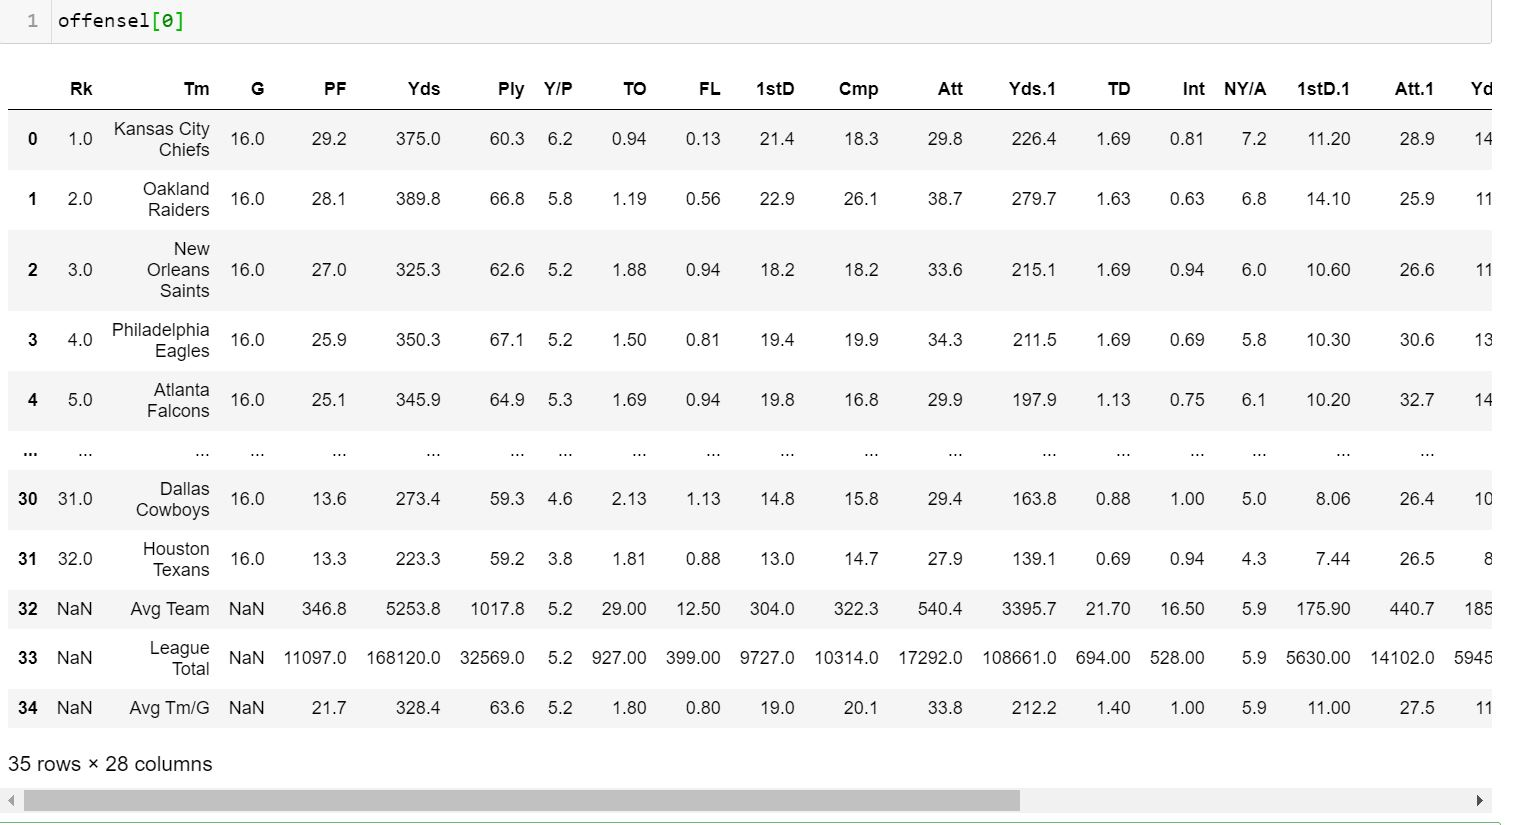

Similarly, the defensive data looks like this:

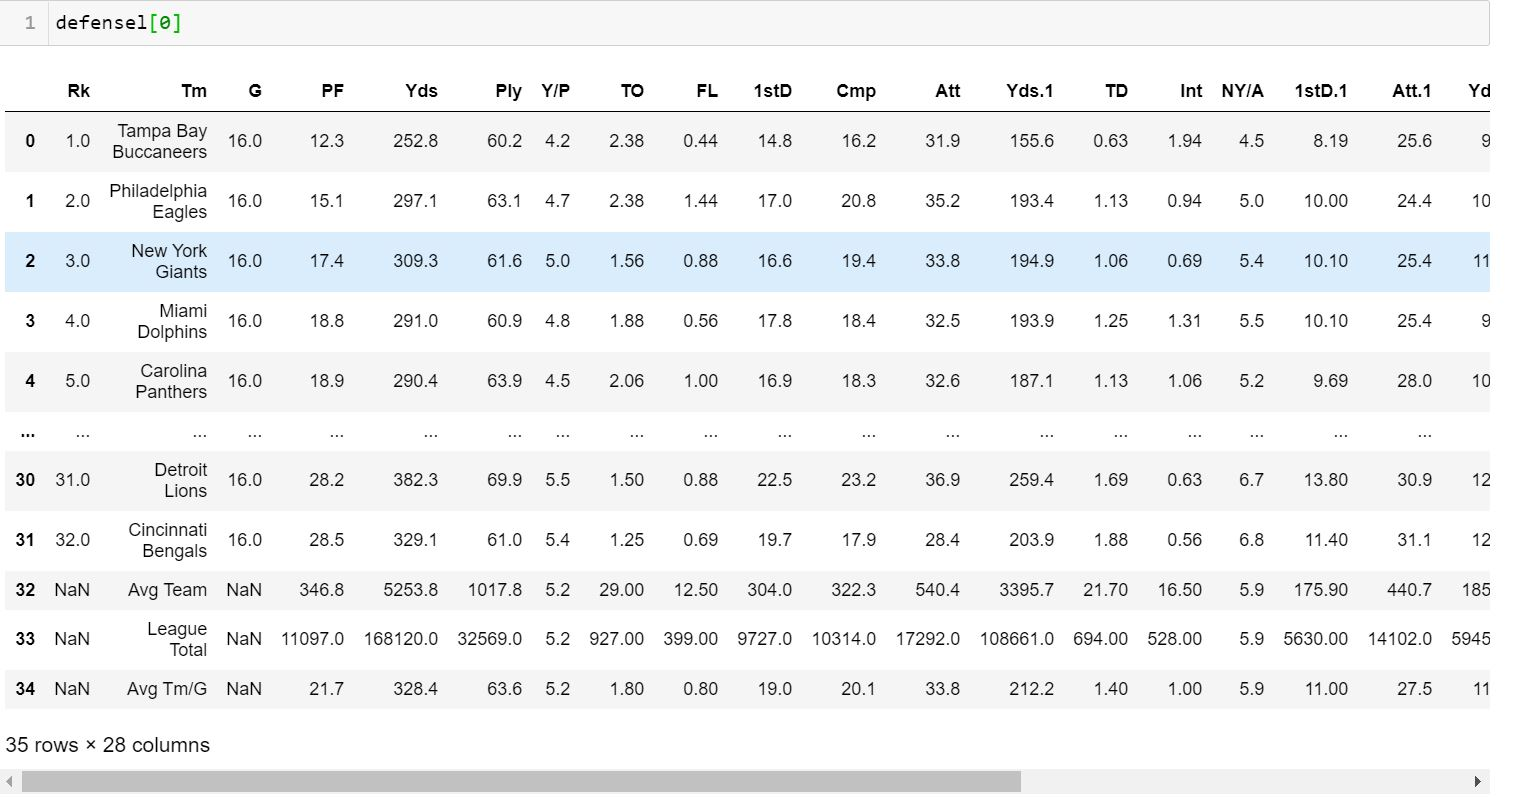

Both follow the same structure: First is the total offensive or defensive stats, followed by the passing stats, and finally the rushing stats. Both have 28 columns, and both have 32 rows (after removing the 3 meaningless rows that are part of the file) each corresponding to one of the 32 NFL teams. It is important to understand that the defensive stats are essentially the opposite of the offensive stats. This is to say, a team's defensive stats are the same as the combined offensive stats of the opposing team for each game. 

After adding a year to the data for merging purposes, the data is combined into a single source that looks like this:

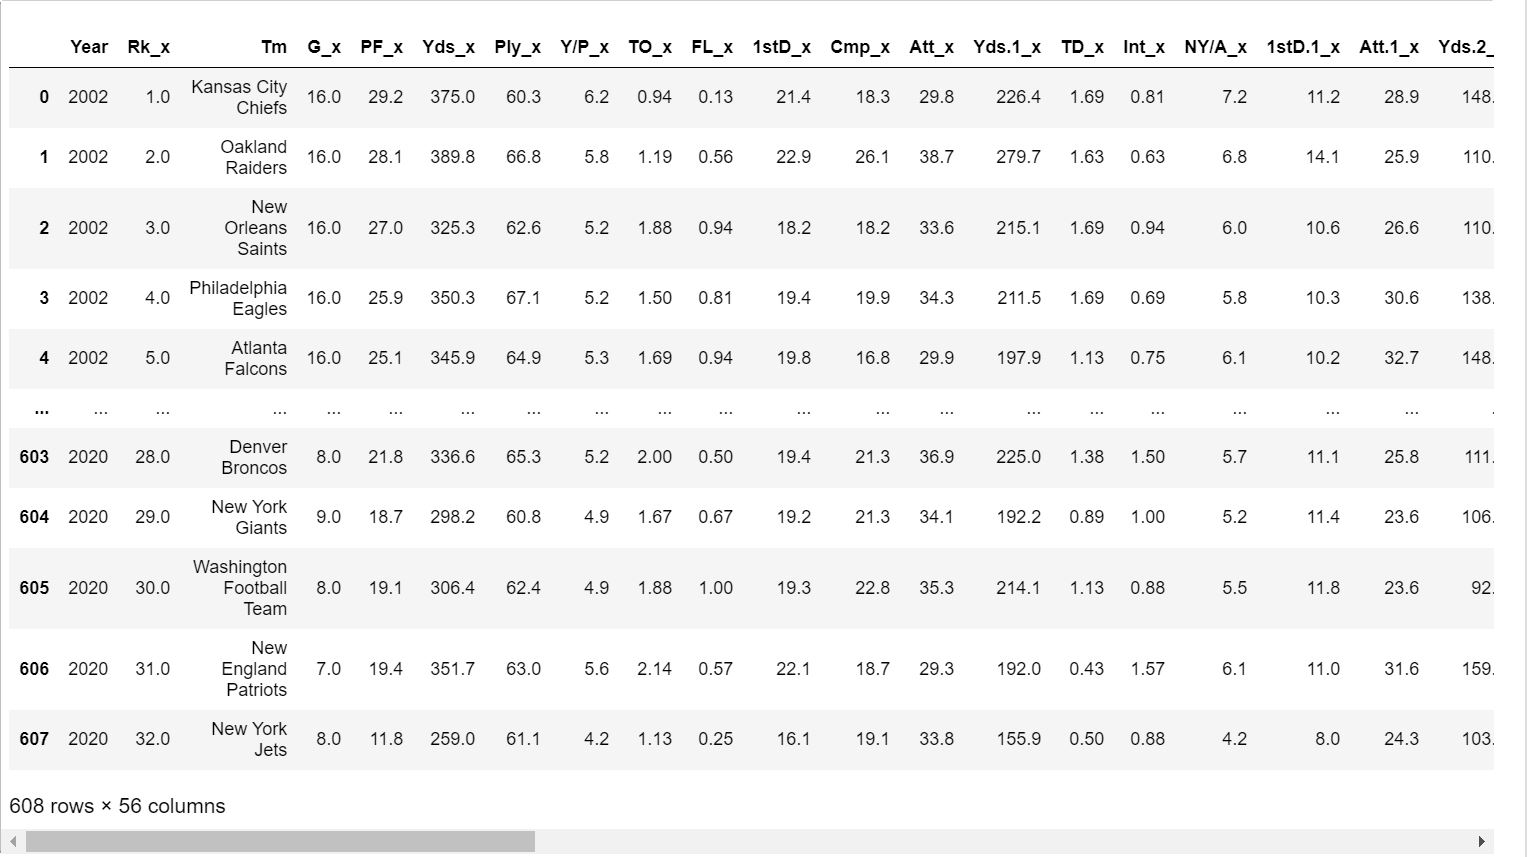

Unnecessary columns are then removed before clustering is performed. These include the year, the team, the number of games played, and the offensive and defensive rankings. The rankings are a per season metric of where a team ranks relative to the rest of the league, but it is simply a ranking of a single metric which is also included in the data itself, so I choose to remove it. 

Since the magnitude of the columns differs (one turnover per game is more significant than one rushing yard per game) scaling needs to be performed, so I use StandardScaler. With the data scaled, the next step is to try to find the right number of clusters. I choose to look at both the calinski_harabasz and silhouette scores.

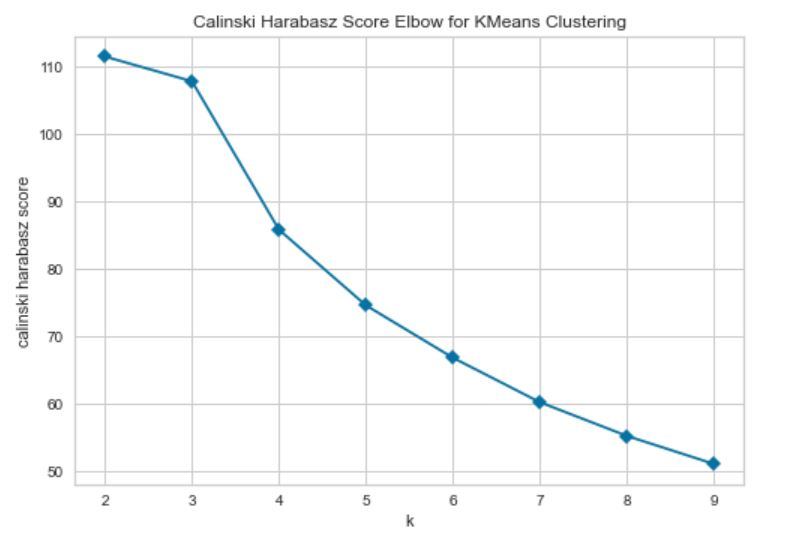

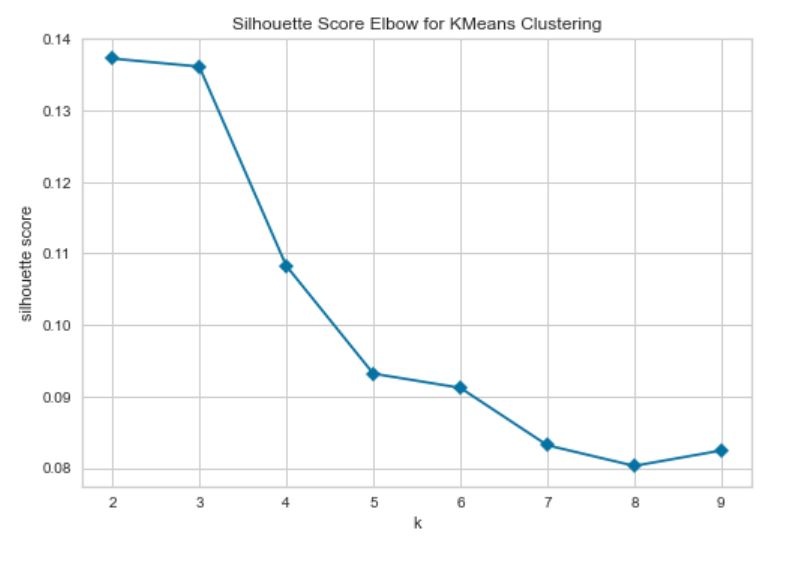

It looks like 3 clusters might be the best number, but the results could be better. It could be due in part to highly corelated features or noise. One of the ways to deal with this is to use Principal Component Analysis. This allows the data to be represented in lower dimensional space, or to reduce the number of features present in the data without losing a meaningful amount of the variance.

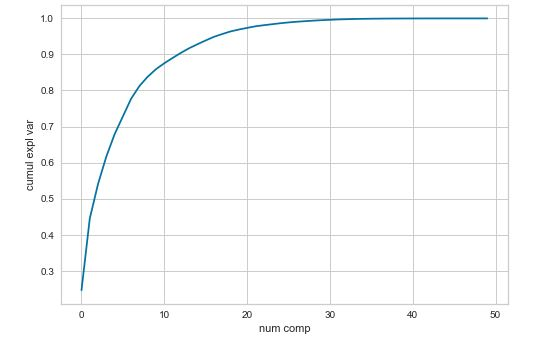

There do seem to be a lot of redundant layers. It's a bit arbitrary how many levels to reduce the data to, but the 90% line seems reasonable as it's right in the middle of the big curve. It allows for the removal of some potential noise while still keeping the vast majority of the variance of the original data. The 90% explained variance level corresponds with 13 components, which is significantly less than the original number of features.

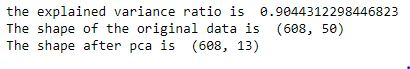

As can be seen, for just the cost of 10% of the variance, 37 dimensions were removed. Now it is time to try again to find the best number of clusters. 

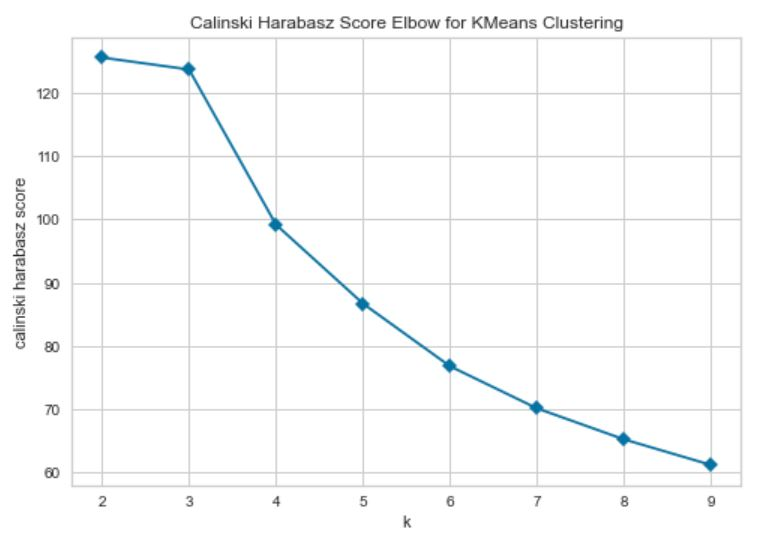

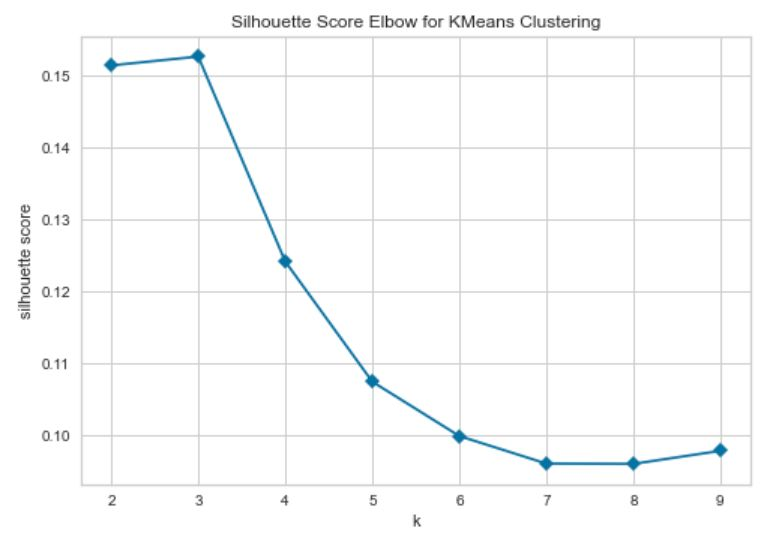

The dimensionally reduced data scores slightly better on both metrics, and for the silhouette score in particular, it seems that 3 is a bit more visibly the right number of clusters, so that's what I will go with.

After clustering the data, I add the clusters back to the original unscaled data in order to help in visualizing the data. 

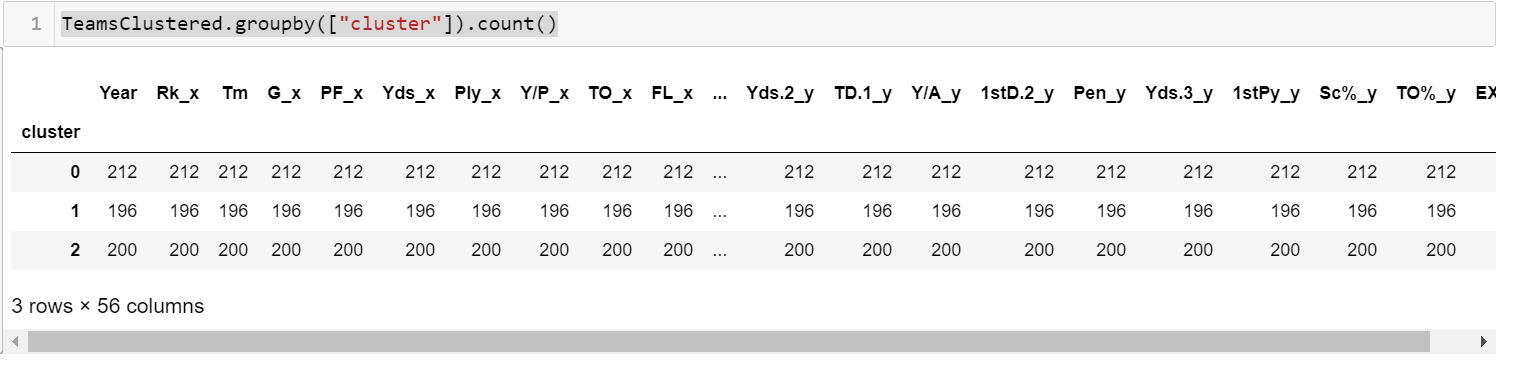

The main focus here is the number of teams per cluster. Now that clusters have been added, it is possible to take a closer look at the clusters and see what sets them apart from one another.


# Results and Discussion

Before breaking into the specifics of the clusters, I plot the first two components created by PCA to see if there appears to be anything meaningful to be found.

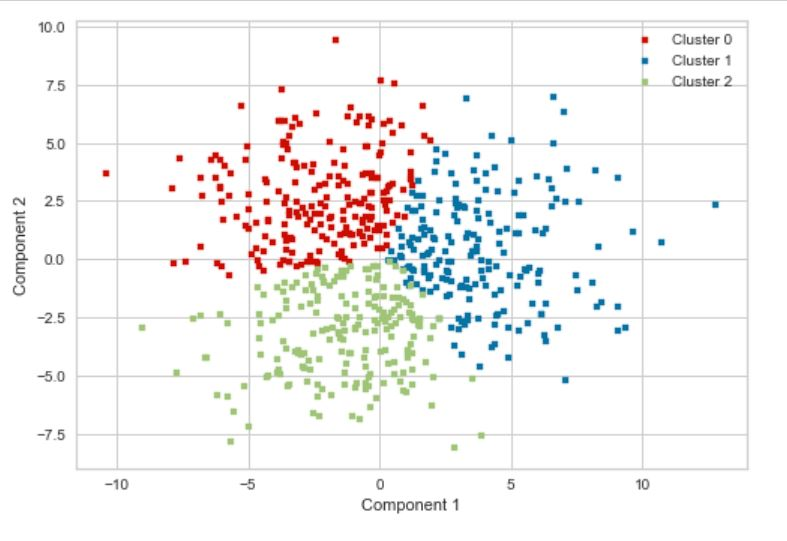

While these two components by themselves account for less than half the variance, the clustering does seem reasonable here. It does seem like there is a difference between each of the 3 clusters on these components, and it does not seem like a different number of clusters would make any more sense to me. I try with the second and third components next.

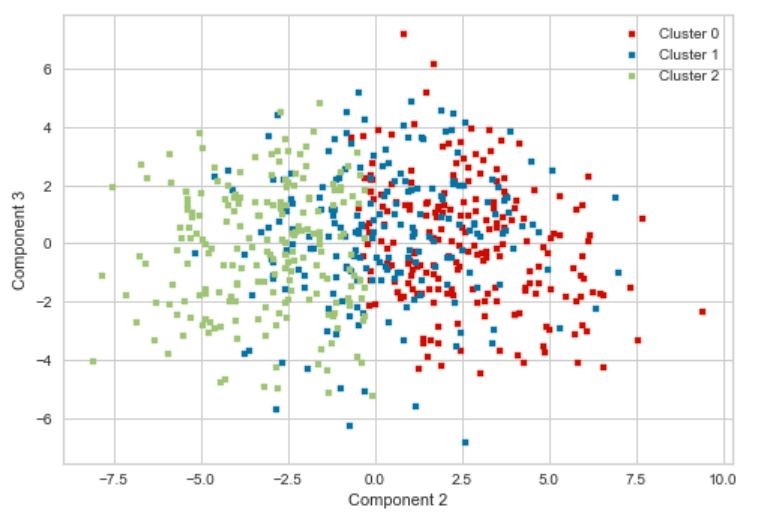

Clusters 0 and 2 seem to have a meaningful difference, but cluster 1 is all over the place. This seems to imply that looking further will give less and less meaningful information. However even from these two plots, I can see that there does seem to be meaningful differences between the clusters on some level.

However, it is not clear how to interpret what exactly components 1, 2, and 3 represent in terms of the original data. To get a feel for how the clusters compare with interpretable stats, I plot the original data with the cluster assignments to try to find meaningful differences. 

Since I am using offensive and defensive data only, I think comparing a team's offense to it's own defense is a good place to start. First up is points per game:

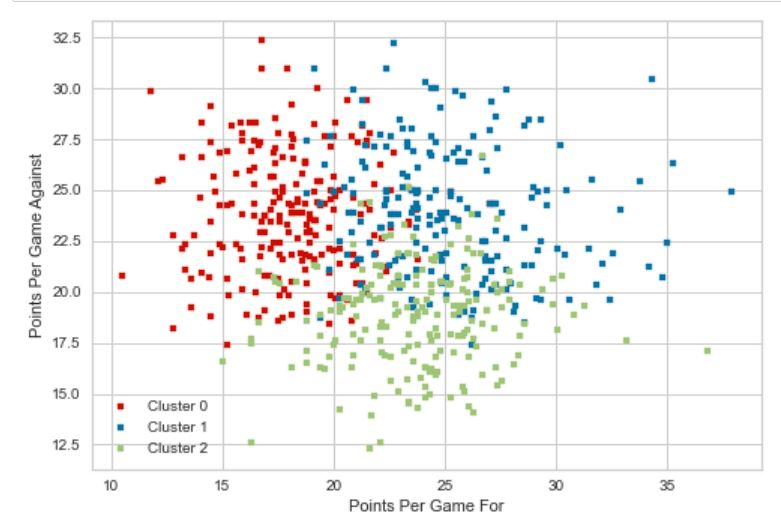

Since defense is the opposite of offence, a higher value is worse, so closer to 0 on that axis is better. There is some overlap in the center, but there seems to be meaningful separation as it gets a bit further out. It seems like cluster 0 and cluster 1 allow roughly the same number of points per game, but cluster 0 seems to score significantly less points per game for themselves than cluster 1. Cluster 2, meanwhile, seems to allow the fewest points per game, while scoring slightly fewer points for themselves than cluster 1, but a fair amount more than cluster 0. This seems to imply that cluster 2 has the best scoring balance, while cluster 1 has the best scoring offense, and cluster 0 is lacking in both.

Next I check the yards per game to see if they tell the same story as the points do:

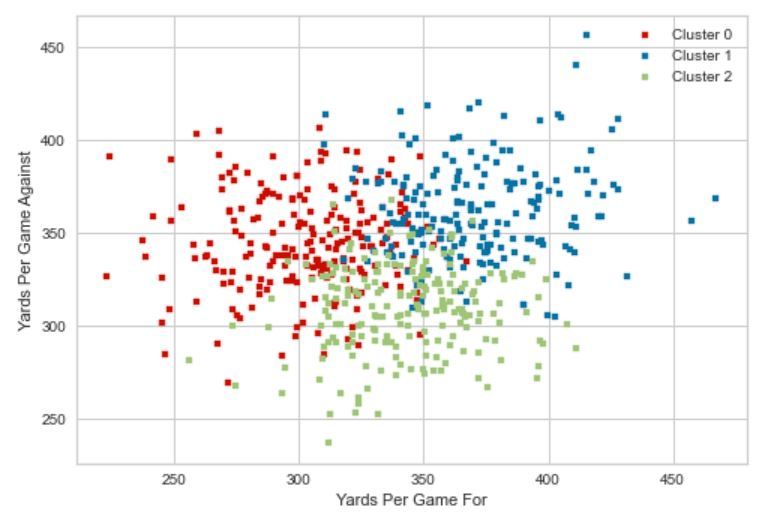

It appears that the same trend continues. While there is more overlap in the center, it looks like on the whole cluster 2 gives up the fewest yards per game, while comfortably gaining the second most yards for themselves. Cluster 1 again gains the most yards for themselves while allowing a lot of yards to opponents, and cluster 0 gets the fewest yards for themselves. However, this time it seems like at least cluster 0 allows slightly less yards per game than cluster 1.

Another important team statistic is turnover differential. I plot the turnovers and takeaways:

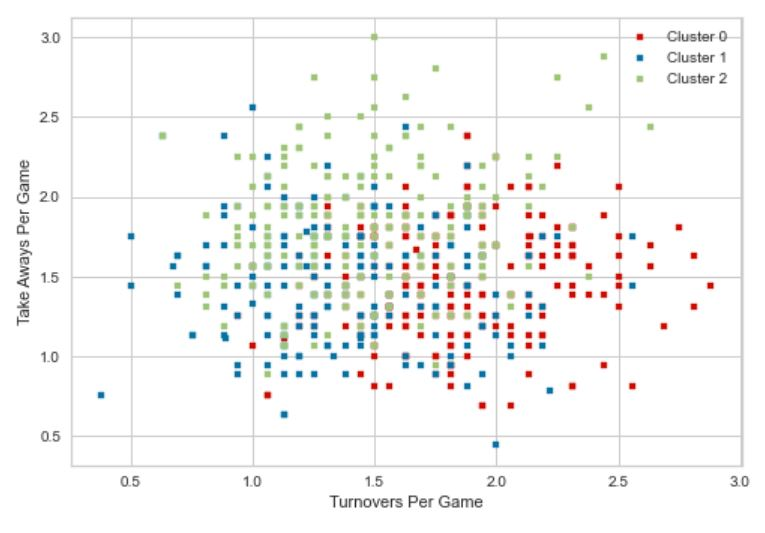

This is one of the few stats where the defensive metric is positive and the offensive metric is negative. So for this graph, a higher value in the y axis is better, and a lower number in the x axis is better. This is a bit harder to read due to the smaller units making less values possible, but the same trend seems to be present. Cluster 2 has the best defensive metric, getting the most takeaways for themselves. Cluster 1 seems to turn it over about as often as cluster 2, but gets fewer takeaways for themselves. Cluster 0 gets less takeaways and turns it over more often than the other two clusters, which is not a good sign.

What these team metrics seem to show is that cluster 2 teams have the best defense and the best overall balance between defense and offense, the cluster 1 teams have a better offense at the cost of defense, and the cluster 0 teams leave something to be desired in both offense and defense. 

One more way to evaluate the teams is to see how their offense and defense metrics split between passing and rushing. First for defense:

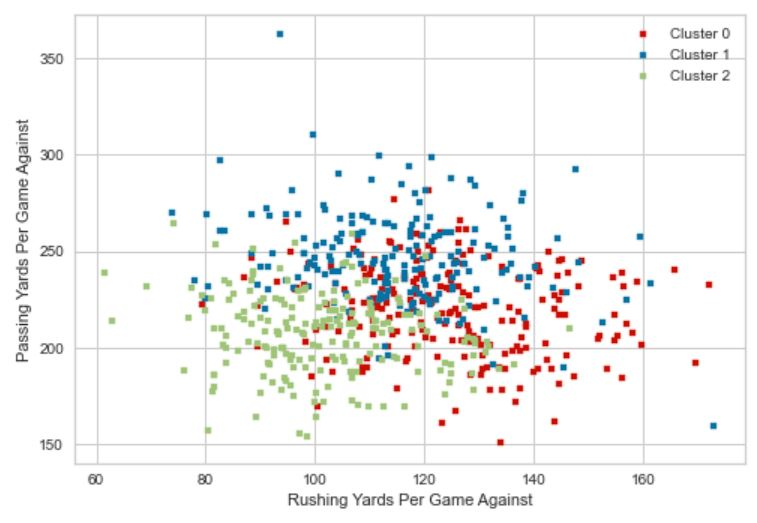

The narrative holds, cluster 2 teams seem to clearly have the best defenses, giving up the fewest yards per game in both rushing and passing. Cluster 1 gives up the most passing yards, and cluster 0 gives up the most rushing yards. It is never good to give up many yards of either type, but usually giving up many rushing yards is a sign that the other team is able to control the pace of the game, which leads to lopsided time of possession and tires out the defense as the game wears on.

Finally, the offense:

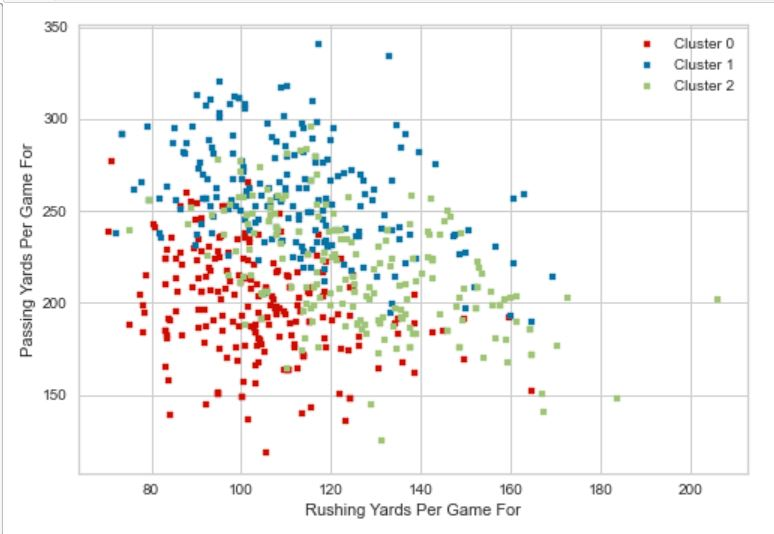

The pattern holds here as well, sort of. Cluster 1 has the most passing yards per game by a decent margin. However, cluster 2 teams seem to have the most rushing yards per game. This makes sense, as traditionally teams with good defenses tend to focus on controlling time of possession, which means they have a stronger focus on rushing than passing. It also makes sense for cluster 1 to have the most passing yards. Since their defense is worse than cluster 2 teams, they might need more points per game to win since they allow more points. Traditionally higher scoring teams tend to favor the pass, and teams usually gain more yards passing than rushing regardless. Cluster 0 again leaves much to be desired.

Overall, the 3 clusters seem to have meaningful differences. Cluster 2 appears to have the teams with the best defenses, while also having the best rushing offensives. This makes them the overall best all-around teams. Cluster 1 appears to have the best overall offenses, but with a stronger focus on passing than rushing. Their defenses are significantly worse than cluster 2 teams. Finally, cluster 0 teams seem to be the all-around worst teams.


# Conclusion and Summary

In conclusion, this project both did and did not do what I set out to do. 

For the goal of making it easier for fans to understand the relative skill of teams in order to potentially help drive traffic for media outlets, this clustering does that to an extent. If a team is put into cluster 0, there is a good chance that the team will run into problems sooner or later. If the team is falls in cluster 2, there is a good chance that the team is at least decent, since cluster 2 is where the best all-around teams seem to end up. If a team ends up in cluster 1, however, it is unclear how to interpret that from a skill standpoint. The teams in cluster 1 tend to not be great defensively, but their passing offenses tend to be very good, so a team in that category could conceivably be good or just be ok. 

For the goal of helping NFL teams to understand themselves and their opponents better, this is at best a start. While there can be some meaning found to these groupings to know roughly what overall type of team a team happens to be, there simply are not enough groupings to help in terms of looking at film more closely. Since each cluster has nearly 200 teams, it could be considered a start, but more work would have to be done to narrow down which teams are the most similar to each other. 

While this project is closer to the goal for media outlets than helping NFL teams, ultimately I would say that this project is best looked at as a beginning, not a finished work. There still remains work to be done in order to get where it needs to be, but there are some clear ways forward.

# Limitations and Later Work

Some of the bigger limitations are mentioned in the previous section. This project does not split the data up into enough meaningful groups to truly be of help to NFL teams, and while it can help put a team into some sort of context for fans, it is not as clear as I would like what each cluster really corresponds to in terms of skill.

Perhaps some of these problems would be at least helped out by adding in more statistics. It is possible that more stats will just complicate things, but it is also possible that some of these more complex stats, as well as special teams stats, are necessary to truly understanding the relationship between teams. Perhaps adding in more seasons of data would also help. It is possible that this skews the data to a degree since as mentioned above, any further back and the league format changes, but maybe the extra points for comparison would make up for that.

Other than adding more stats and seasons, the first thing that I will look to do is dive deeper into each of the clusters. I want to see how teams in a cluster differ from teams in the same cluster, to see if it is possible to divide these 3 main clusters into subclusters, which would help things greatly. While I do not want to include it in the clustering data, it might also be a good idea to add win totals to the original data, so that average wins per season could be used to give a rough idea about how many games teams from each cluster tend to win. 

# References and Contributions

Example of offensive team data: https://www.pro-football-reference.com/years/2020/index.htm

Example of defensive team data: https://www.pro-football-reference.com/years/2002/opp.htm

Years from 2002-2020 are used for this project. The "Total Offense" and "Total Defense" tables for each season are what I use. Toggle per game stats.

Example of previous work on clustering to find free agent fits: https://www.pff.com/news/nfl-using-clustering-to-find-fits-for-free-agent-wide-receivers

Example of previous work on clustering to compare 2019 NFL offenses: https://comfortablynumb-ers.blogspot.com/2020/04/profiling-2019-nfl-offenses-with.html